<a href="https://colab.research.google.com/github/PrajwalRPrasad/MODALANDIFRAME/blob/master/IAT_LAB_2_18BBTCS086.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

US Baby Names 1880–2010: The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 to 2010<br>
i. Use Data Wrangling to load this dataset<br>
ii. Find sum of the birth’s column by sex as the total number of births in that year<br>
iii. Assemble all of the data into a single Data Frame and further add a year field<br>
iv. Visualize total births by sex and year

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#i. Use Data Wrangling to load this dataset

names1888 = pd.read_csv('yob1888.txt',
                       names=['name', 'sex', 'births'])
names1888.head()

,name,sex,births
0,Mary,F,11754
1,Anna,F,4982
2,Elizabeth,F,3224
3,Emma,F,3087
4,Margaret,F,2904


In [ ]:
#Loading the multiple datasets of years and 
#iii. Assemble all of the data into a single Data Frame and further add a year field

years = [1888,1889,1900,1910,1928,1940,1969,1980,2000,2010]
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

result = pd.concat(pieces, ignore_index=True)
result

,name,sex,births,year
0,Mary,F,11754,1888
1,Anna,F,4982,1888
2,Elizabeth,F,3224,1888
3,Emma,F,3087,1888
4,Margaret,F,2904,1888
...,...,...,...,...
129745,Zymaire,M,5,2010
129746,Zyonne,M,5,2010
129747,Zyquarius,M,5,2010
129748,Zyran,M,5,2010


In [ ]:
#ii. Find sum of the birth’s column by sex as the total number of births in that year

total_births = result.pivot_table('births', index='year',
                                columns='sex', aggfunc='sum')
total_births

sex,F,M
year,,
1888,178622,120851
1889,178366,110580
1900,299800,150483
1910,396502,194213
1928,1153221,1107618
1940,1143393,1158985
1969,1686999,1789216
1980,1660147,1784390
2000,1815110,1962969


AxesSubplot(0.125,0.125;0.775x0.755)


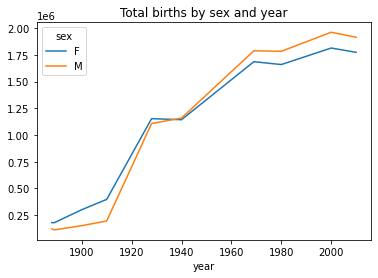

In [ ]:
#iv. Visualize total births by sex and year

line_graph = total_births.plot(title='Total births by sex and year')
print(line_graph)